In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error




In [2]:
file_name = 'Mental_Health_Care.csv'
df = pd.read_csv(file_name)

In [3]:
print("Dataset Loaded Successfully")
print(df.head())
print("\nDataset Info:")
df.info()

Dataset Loaded Successfully
                                           Indicator              Group  \
0  Took Prescription Medication for Mental Health...  National Estimate   
1  Took Prescription Medication for Mental Health...             By Age   
2  Took Prescription Medication for Mental Health...             By Age   
3  Took Prescription Medication for Mental Health...             By Age   
4  Took Prescription Medication for Mental Health...             By Age   

           State       Subgroup Phase  Time Period      Time Period Label  \
0  United States  United States     2           13  Aug 19 - Aug 31, 2020   
1  United States  18 - 29 years     2           13  Aug 19 - Aug 31, 2020   
2  United States  30 - 39 years     2           13  Aug 19 - Aug 31, 2020   
3  United States  40 - 49 years     2           13  Aug 19 - Aug 31, 2020   
4  United States  50 - 59 years     2           13  Aug 19 - Aug 31, 2020   

  Time Period Start Date Time Period End Date  Value  LowC

In [4]:
# Drop 'Suppression Flag' due to excessive missing values
if 'Suppression Flag' in df.columns:
    df.drop(columns=['Suppression Flag'], inplace=True)

# Fill missing numerical columns with median
df['Value'].fillna(df['Value'].median(), inplace=True)
df['LowCI'].fillna(df['LowCI'].median(), inplace=True)
df['HighCI'].fillna(df['HighCI'].median(), inplace=True)

# Fill missing categorical column 'Quartile Range' with 'Unknown'
df['Quartile Range'].fillna('Unknown', inplace=True)

# Convert date columns to datetime
df['Time Period Start Date'] = pd.to_datetime(df['Time Period Start Date'])
df['Time Period End Date'] = pd.to_datetime(df['Time Period End Date'])

# Extract year and month from 'Time Period Start Date'
df['Year'] = df['Time Period Start Date'].dt.year
df['Month'] = df['Time Period Start Date'].dt.month

# Verify the cleaning process
print("\nData Info After Cleaning:")
df.info()
print("\nMissing Values After Cleaning:")
print(df.isnull().sum())



Data Info After Cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10404 entries, 0 to 10403
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Indicator               10404 non-null  object        
 1   Group                   10404 non-null  object        
 2   State                   10404 non-null  object        
 3   Subgroup                10404 non-null  object        
 4   Phase                   10404 non-null  object        
 5   Time Period             10404 non-null  int64         
 6   Time Period Label       10404 non-null  object        
 7   Time Period Start Date  10404 non-null  datetime64[ns]
 8   Time Period End Date    10404 non-null  datetime64[ns]
 9   Value                   10404 non-null  float64       
 10  LowCI                   10404 non-null  float64       
 11  HighCI                  10404 non-null  float64       
 12  Confidence Interval

<ipython-input-4-d2246bf08002>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Value'].fillna(df['Value'].median(), inplace=True)
<ipython-input-4-d2246bf08002>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

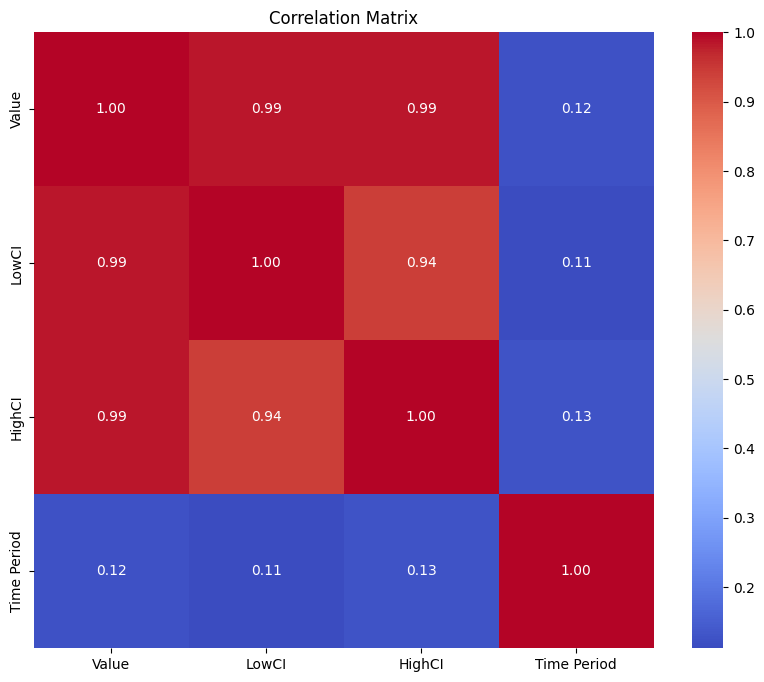

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix for numerical features
correlation_matrix = df[['Value', 'LowCI', 'HighCI', 'Time Period']].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [6]:
# Encode categorical columns using one-hot encoding
categorical_cols = ['Indicator', 'Group', 'State', 'Subgroup', 'Phase', 'Quartile Range']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Define features (X) and target (y)
X = df_encoded.drop(columns=['Value', 'Confidence Interval', 'Time Period Label', 'Time Period Start Date', 'Time Period End Date'])
y = df_encoded['Value']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Define the models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)
    print(f"{name} - Train MSE: {mean_squared_error(y_train, train_preds):.2f}, Test MSE: {mean_squared_error(y_test, test_preds):.2f}")


Linear Regression - Train MSE: 0.00, Test MSE: 0.00
Decision Tree - Train MSE: 0.00, Test MSE: 0.04
Random Forest - Train MSE: 0.00, Test MSE: 0.01
Gradient Boosting - Train MSE: 0.03, Test MSE: 0.04


In [8]:
# Define the models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42)
}


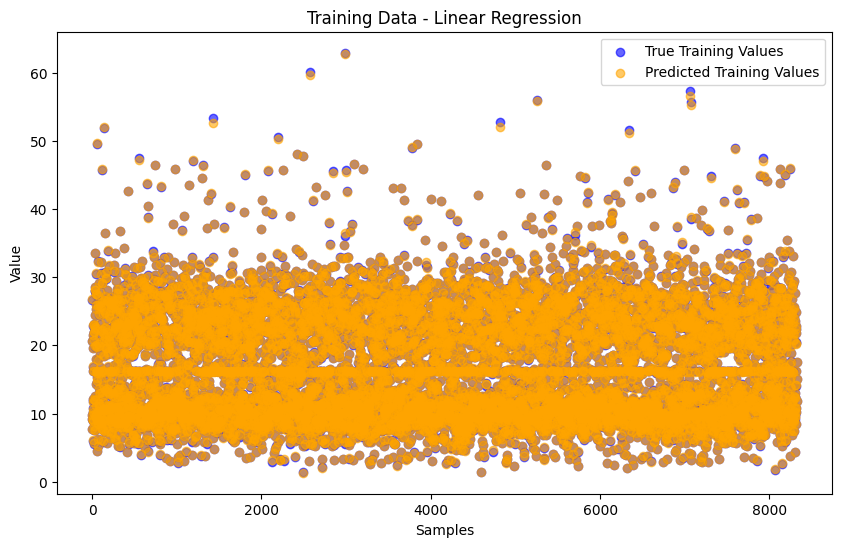

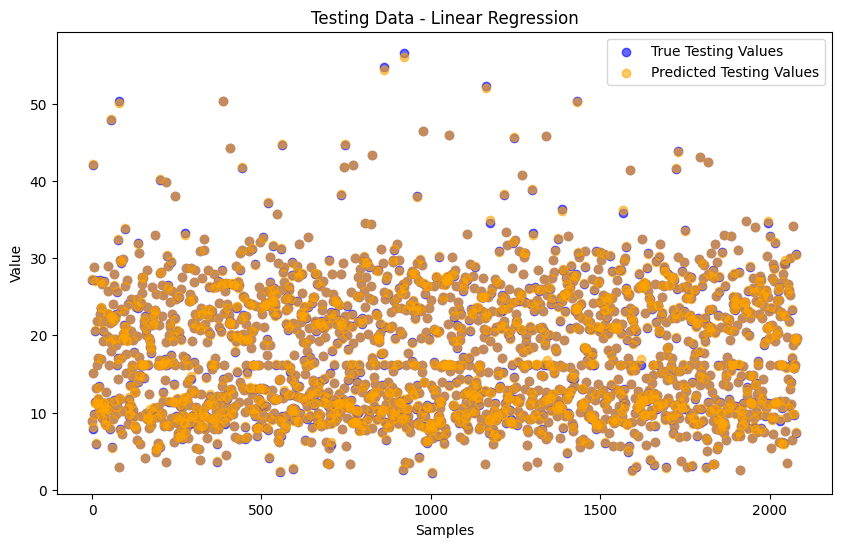

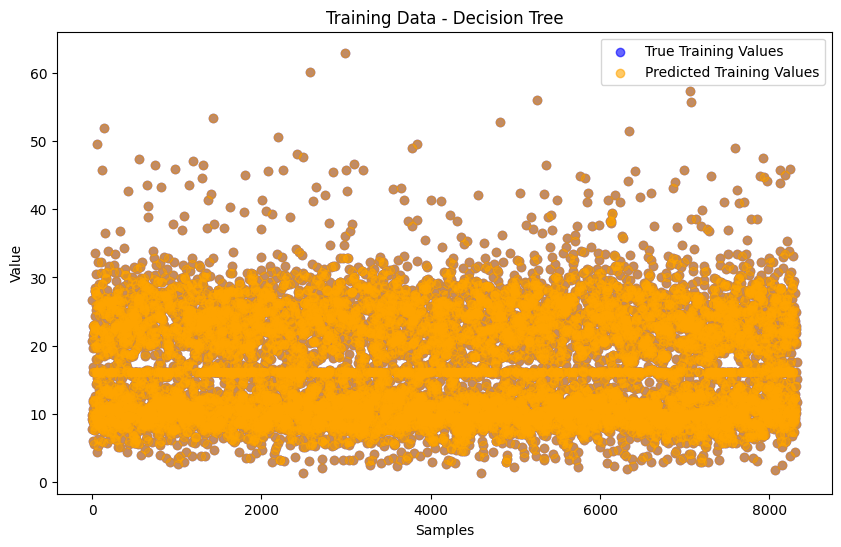

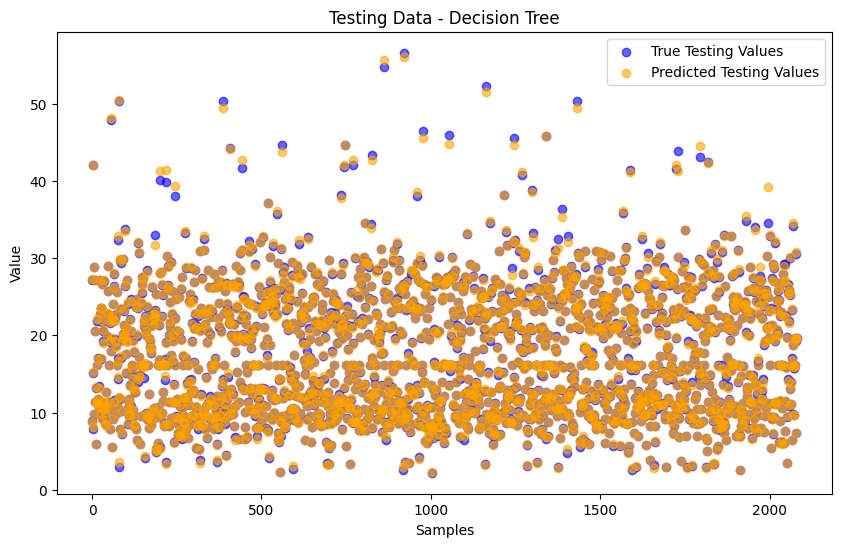

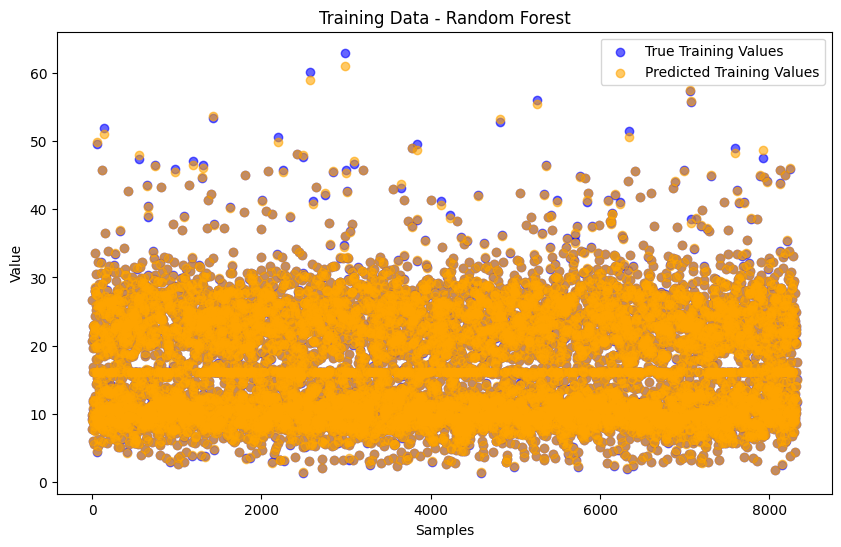

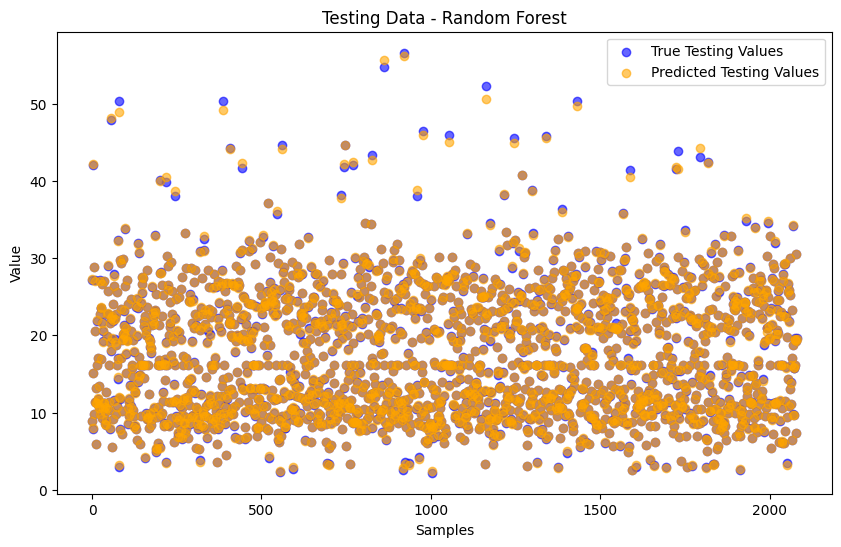

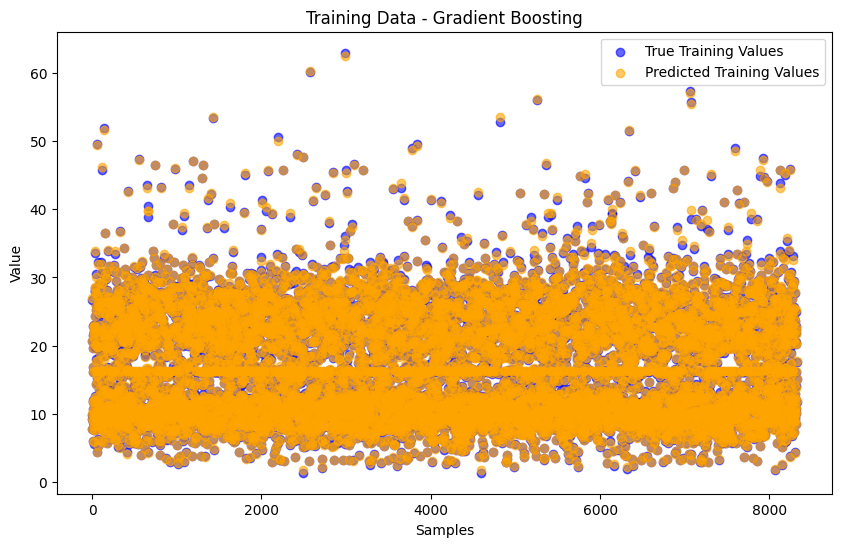

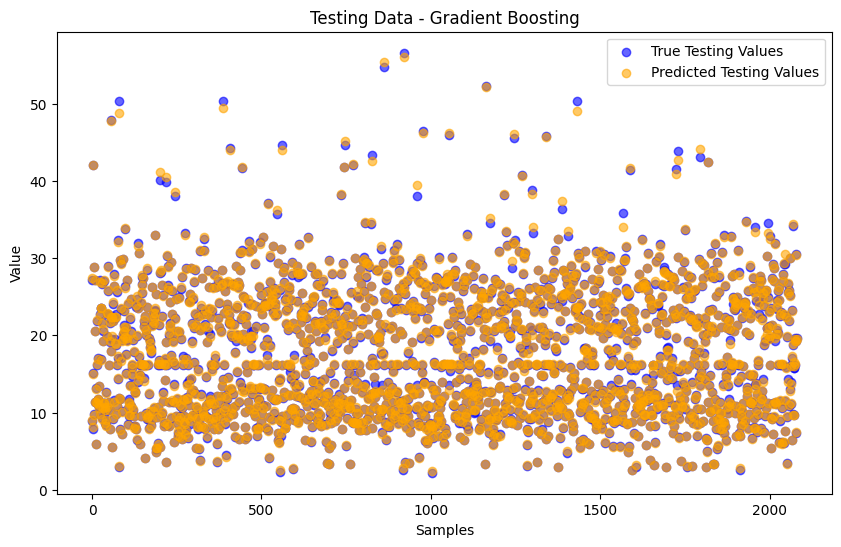

In [9]:
# Train and plot results for each model
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predict on train and test sets
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    # Plot the training data results
    plt.figure(figsize=(10, 6))
    plt.scatter(range(len(y_train)), y_train, label="True Training Values", alpha=0.6, color='blue')
    plt.scatter(range(len(train_preds)), train_preds, label="Predicted Training Values", alpha=0.6, color='orange')
    plt.title(f"Training Data - {name}")
    plt.xlabel("Samples")
    plt.ylabel("Value")
    plt.legend()
    plt.show()

    # Plot the testing data results
    plt.figure(figsize=(10, 6))
    plt.scatter(range(len(y_test)), y_test, label="True Testing Values", alpha=0.6, color='blue')
    plt.scatter(range(len(test_preds)), test_preds, label="Predicted Testing Values", alpha=0.6, color='orange')
    plt.title(f"Testing Data - {name}")
    plt.xlabel("Samples")
    plt.ylabel("Value")
    plt.legend()
    plt.show()


In [10]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Function to evaluate models
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    total_instances = len(y_true)
    print(f"Evaluation Summary for {model_name}:")
    print(f"Correctly Classified Instances: Not Applicable (Regression Model)")
    print(f"Incorrectly Classified Instances: Not Applicable (Regression Model)")
    print(f"R-squared Score (Kappa): {r2:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"Relative Absolute Error (RAE): {(mae / np.mean(y_true)) * 100:.2f}%")
    print(f"Root Relative Squared Error (RRSE): {(rmse / np.sqrt(np.mean((y_true - np.mean(y_true))**2))) * 100:.2f}%")
    print(f"Total Number of Instances: {total_instances}")
    print("-" * 50)

# Evaluate each model
for name, model in models.items():
    print(f"Evaluating Model: {name}")
    # Predictions for train and test
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    # Train evaluation
    print("Training Data Evaluation:")
    evaluate_model(y_train, train_preds, f"{name} (Train)")

    # Test evaluation
    print("Testing Data Evaluation:")
    evaluate_model(y_test, test_preds, f"{name} (Test)")


Evaluating Model: Linear Regression
Training Data Evaluation:
Evaluation Summary for Linear Regression (Train):
Correctly Classified Instances: Not Applicable (Regression Model)
Incorrectly Classified Instances: Not Applicable (Regression Model)
R-squared Score (Kappa): 0.9999
Mean Absolute Error (MAE): 0.0443
Root Mean Squared Error (RMSE): 0.0637
Relative Absolute Error (RAE): 0.26%
Root Relative Squared Error (RRSE): 0.79%
Total Number of Instances: 8323
--------------------------------------------------
Testing Data Evaluation:
Evaluation Summary for Linear Regression (Test):
Correctly Classified Instances: Not Applicable (Regression Model)
Incorrectly Classified Instances: Not Applicable (Regression Model)
R-squared Score (Kappa): 0.9999
Mean Absolute Error (MAE): 0.0478
Root Mean Squared Error (RMSE): 0.0689
Relative Absolute Error (RAE): 0.27%
Root Relative Squared Error (RRSE): 0.85%
Total Number of Instances: 2081
--------------------------------------------------
Evaluating M

In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Function to compute detailed regression metrics
def detailed_regression_metrics(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    print(f"Detailed Metrics for {model_name}:")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"R-squared (R2): {r2:.4f}")
    print(f"Relative Absolute Error (RAE): {(mae / np.mean(y_true)) * 100:.2f}%")
    print(f"Root Relative Squared Error (RRSE): {(rmse / np.std(y_true)) * 100:.2f}%")
    print(f"Total Instances: {len(y_true)}")
    print("-" * 50)

# Evaluate each model
for name, model in models.items():
    print(f"Evaluating Model: {name}")

    # Predictions for training and testing datasets
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    # Train Metrics
    print("Training Data Metrics:")
    detailed_regression_metrics(y_train, train_preds, f"{name} (Train)")

    # Test Metrics
    print("Testing Data Metrics:")
    detailed_regression_metrics(y_test, test_preds, f"{name} (Test)")


Evaluating Model: Linear Regression
Training Data Metrics:
Detailed Metrics for Linear Regression (Train):
Mean Absolute Error (MAE): 0.0443
Root Mean Squared Error (RMSE): 0.0637
R-squared (R2): 0.9999
Relative Absolute Error (RAE): 0.26%
Root Relative Squared Error (RRSE): 0.79%
Total Instances: 8323
--------------------------------------------------
Testing Data Metrics:
Detailed Metrics for Linear Regression (Test):
Mean Absolute Error (MAE): 0.0478
Root Mean Squared Error (RMSE): 0.0689
R-squared (R2): 0.9999
Relative Absolute Error (RAE): 0.27%
Root Relative Squared Error (RRSE): 0.85%
Total Instances: 2081
--------------------------------------------------
Evaluating Model: Decision Tree
Training Data Metrics:
Detailed Metrics for Decision Tree (Train):
Mean Absolute Error (MAE): 0.0000
Root Mean Squared Error (RMSE): 0.0000
R-squared (R2): 1.0000
Relative Absolute Error (RAE): 0.00%
Root Relative Squared Error (RRSE): 0.00%
Total Instances: 8323
--------------------------------

In [15]:
from sklearn.metrics import confusion_matrix, classification_report

# Define a threshold for categorizing regression outputs
threshold = 0.5  # Adjust based on your specific use case

# Function to calculate and display confusion matrix
def evaluate_confusion_matrix(y_true, y_pred, model_name):
    # Threshold predictions
    y_pred_class = (y_pred >= threshold).astype(int)
    y_true_class = (y_true >= threshold).astype(int)

    # Compute confusion matrix
    cm = confusion_matrix(y_true_class, y_pred_class)
    print(f"Confusion Matrix for {model_name}:")
    print("Classified as:")
    print(f"a = no-recurrence-events")
    print(f"b = recurrence-events")
    print(cm)
    print("-" * 50)

# Evaluate each model
for name, model in models.items():
    print(f"Evaluating Model: {name}")

    # Predictions for testing dataset
    test_preds = model.predict(X_test)

    # Confusion Matrix
    evaluate_confusion_matrix(y_test, test_preds, name)


Evaluating Model: Linear Regression
Confusion Matrix for Linear Regression:
Classified as:
a = no-recurrence-events
b = recurrence-events
[[2081]]
--------------------------------------------------
Evaluating Model: Decision Tree
Confusion Matrix for Decision Tree:
Classified as:
a = no-recurrence-events
b = recurrence-events
[[2081]]
--------------------------------------------------
Evaluating Model: Random Forest


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


Confusion Matrix for Random Forest:
Classified as:
a = no-recurrence-events
b = recurrence-events
[[2081]]
--------------------------------------------------
Evaluating Model: Gradient Boosting
Confusion Matrix for Gradient Boosting:
Classified as:
a = no-recurrence-events
b = recurrence-events
[[2081]]
--------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


Evaluating Model: Linear Regression


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


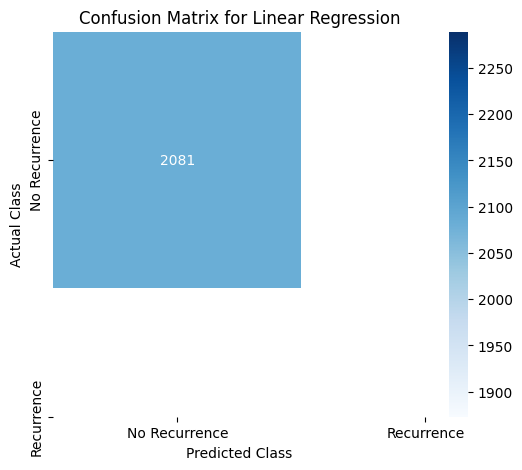

Evaluating Model: Decision Tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


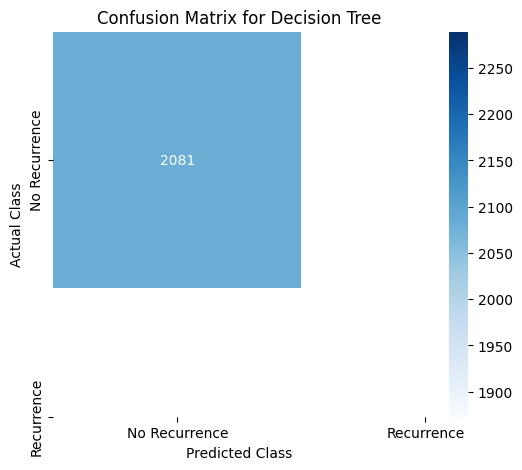

Evaluating Model: Random Forest


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


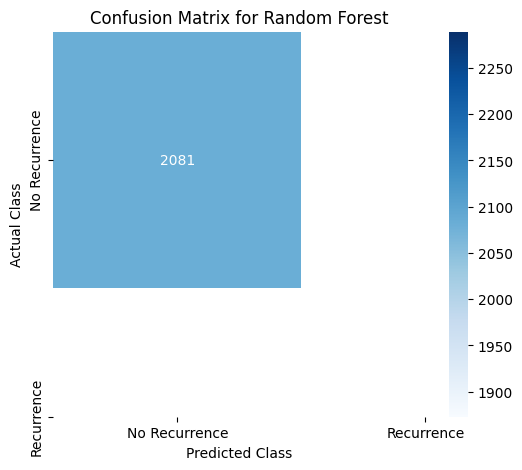

Evaluating Model: Gradient Boosting


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


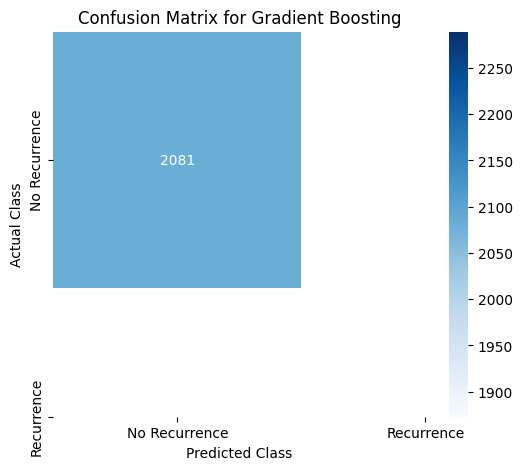

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Define a threshold for categorizing regression outputs
threshold = 0.5

# Function to calculate and display confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    # Threshold predictions
    y_pred_class = (y_pred >= threshold).astype(int)
    y_true_class = (y_true >= threshold).astype(int)

    # Compute confusion matrix
    cm = confusion_matrix(y_true_class, y_pred_class)

    # Plot confusion matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['No Recurrence', 'Recurrence'], yticklabels=['No Recurrence', 'Recurrence'])
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted Class")
    plt.ylabel("Actual Class")
    plt.show()

# Evaluate each model
for name, model in models.items():
    print(f"Evaluating Model: {name}")

    # Predictions for testing dataset
    test_preds = model.predict(X_test)

    # Plot Confusion Matrix
    plot_confusion_matrix(y_test, test_preds, name)


In [17]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Define scoring metrics for regression
scorers = {
    "Mean Absolute Error": make_scorer(mean_absolute_error, greater_is_better=False),
    "Mean Squared Error": make_scorer(mean_squared_error, greater_is_better=False),
    "R-squared": make_scorer(r2_score)
}

# Define k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold cross-validation

# Evaluate each model
reliability_results = {}

for name, model in models.items():
    print(f"Evaluating Model: {name}")
    model_results = {}

    for metric_name, scorer in scorers.items():
        # Perform cross-validation
        scores = cross_val_score(model, X_train, y_train, cv=kf, scoring=scorer)
        model_results[metric_name] = {
            "Mean": np.mean(-scores),  # Convert to positive as scikit-learn uses negative errors
            "Std Dev": np.std(-scores)
        }

        print(f"{metric_name}: Mean = {model_results[metric_name]['Mean']:.4f}, "
              f"Std Dev = {model_results[metric_name]['Std Dev']:.4f}")

    reliability_results[name] = model_results
    print("-" * 50)

# Summarize reliability results
print("Reliability Results for All Models:")
for model_name, metrics in reliability_results.items():
    print(f"\nModel: {model_name}")
    for metric, values in metrics.items():
        print(f"{metric}: Mean = {values['Mean']:.4f}, Std Dev = {values['Std Dev']:.4f}")


Evaluating Model: Linear Regression
Mean Absolute Error: Mean = 0.0483, Std Dev = 0.0009
Mean Squared Error: Mean = 0.0048, Std Dev = 0.0003
R-squared: Mean = -0.9999, Std Dev = 0.0000
--------------------------------------------------
Evaluating Model: Decision Tree
Mean Absolute Error: Mean = 0.1207, Std Dev = 0.0028
Mean Squared Error: Mean = 0.0644, Std Dev = 0.0090
R-squared: Mean = -0.9989, Std Dev = 0.0001
--------------------------------------------------
Evaluating Model: Random Forest
Mean Absolute Error: Mean = 0.0612, Std Dev = 0.0036
Mean Squared Error: Mean = 0.0229, Std Dev = 0.0075
R-squared: Mean = -0.9996, Std Dev = 0.0001
--------------------------------------------------
Evaluating Model: Gradient Boosting
Mean Absolute Error: Mean = 0.1251, Std Dev = 0.0052
Mean Squared Error: Mean = 0.0379, Std Dev = 0.0037
R-squared: Mean = -0.9994, Std Dev = 0.0001
--------------------------------------------------
Reliability Results for All Models:

Model: Linear Regression
Me